(cobweb)=
# 蜘蛛网模型


蜘蛛网模型是一种研究市场中价格和数量如何随时间演变的模型。

## 概述

蜘蛛网模型可以追溯到20世纪30年代，尽管其模型简单，但仍然具有重要意义，
因为它展示了*预期*的根本重要性。

为了给出一些模型运行方式的概念，以及为什么预期重要，想象以下情景。

有一个大豆的市场，价格和交易数量取决于买卖双方的选择。

买方由需求曲线表示——价格低时买得多，价格高时买得少。

卖方有供应曲线——价格高时愿意卖得多，价格低时愿意卖得少。

然而，卖方（即农民）需要时间来种植农作物。

假设现在价格很高。

看到这个高价格，并且可能预计高价格会持续一段时间，农民们种植了许多大豆田。

下个时期，因供应量高，市场价格因此下跌。

看到这个低价，农民们现在减少了大豆种植，限制了供应量，导致价格再次上升。

你可以想象这些动态如何导致价格和数量的周期性变化，并且持续一段时间。

蜘蛛网模型将这些观点转化为方程，以便我们尝试量化它们，并研究在什么条件下周期会持续（或消失）。

在本讲座中，我们在不同假设下，研究并模拟基本模型，假设生产者的预期是不同的。

我们的讨论和模拟借鉴了[高质量讲座](https://comp-econ.org/CEF_2013/downloads/Complex%20Econ%20Systems%20Lecture%20II.pdf)由[Cars Hommes](https://www.uva.nl/en/profile/h/o/c.h.hommes/c.h.hommes.html)提供。

我们将使用以下导入。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

图像输入能力：已启用

## 历史

早期关于蜘蛛网周期的论文包括 {cite}`cobweb_model` 和 {cite}`hog_cycle`。

论文 {cite}`hog_cycle` 使用蜘蛛网定理解释了1920-1950年间美国猪的价格。

下一个图重现了该论文中图2的一部分，绘制了每年的猪价格。

请注意价格的周期性动态，这与上面讨论的周期性大豆价格动态相匹配。

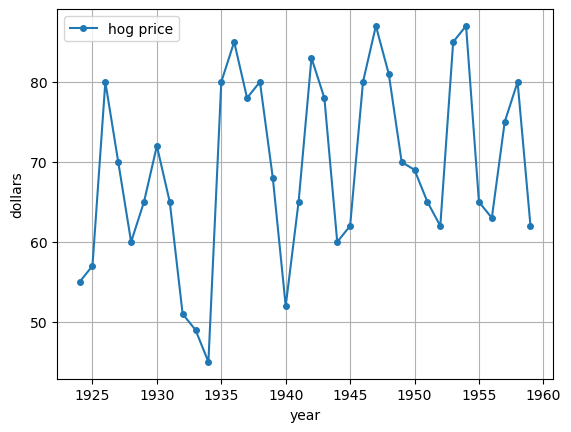

In [2]:
hog_prices = [55, 57, 80, 70, 60, 65, 72, 65, 51, 49, 45, 80, 85,
              78, 80, 68, 52, 65, 83, 78, 60, 62, 80, 87, 81, 70,
              69, 65, 62, 85, 87, 65, 63, 75, 80, 62]
years = np.arange(1924, 1960)
fig, ax = plt.subplots()
ax.plot(years, hog_prices, '-o', ms=4, label='hog price')
ax.set_xlabel('year')
ax.set_ylabel('dollars')
ax.legend()
ax.grid()
plt.show()

接下来我们创建一个 `Market` 实例，并绘制供需曲线。

In [3]:
class Market:

    def __init__(self,
                 a=8,      # demand parameter
                 b=1,      # demand parameter
                 c=6,      # supply parameter
                 d=1,      # supply parameter
                 λ=2.0):   # supply parameter
        self.a, self.b, self.c, self.d = a, b, c, d
        self.λ = λ

    def demand(self, p):
        a, b = self.a, self.b
        return a - b * p

    def supply(self, p):
        c, d, λ = self.c, self.d, self.λ
        return np.tanh(λ * (p - c)) + d

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

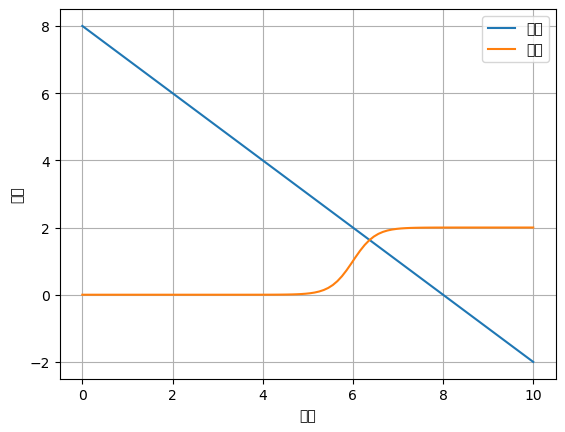

In [4]:
# 创建 Market 实例
market = Market()

# 创建价格范围
p = np.linspace(0, 10, 100)

# 计算需求和供应
demand = market.demand(p)
supply = market.supply(p)

# 绘图
fig, ax = plt.subplots()
ax.plot(p, demand, label='需求')
ax.plot(p, supply, label='供应')
ax.set_xlabel('价格')
ax.set_ylabel('数量')
ax.legend()
ax.grid()
plt.show()

接下来，让我们在供需相等的点上叠加市场均衡。

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

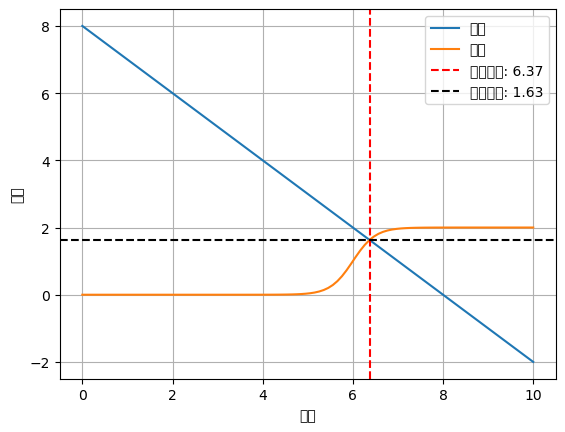

In [5]:
# 寻找均衡点
from scipy.optimize import fsolve

def equilibrium(p):
    return market.demand(p) - market.supply(p)

p_eq = fsolve(equilibrium, 6)[0]

# 绘图
fig, ax = plt.subplots()
ax.plot(p, demand, label='需求')
ax.plot(p, supply, label='供应')
ax.axvline(p_eq, color='r', linestyle='--', label=f'均衡价格: {p_eq:.2f}')
ax.axhline(market.demand(p_eq), color='k', linestyle='--', label=f'均衡数量: {market.demand(p_eq):.2f}')
ax.set_xlabel('价格')
ax.set_ylabel('数量')
ax.legend()
ax.grid()
plt.show()

通过以上绘图，我们可以直观地观察到供需关系以及市场均衡点。

现在让我们绘制图表。

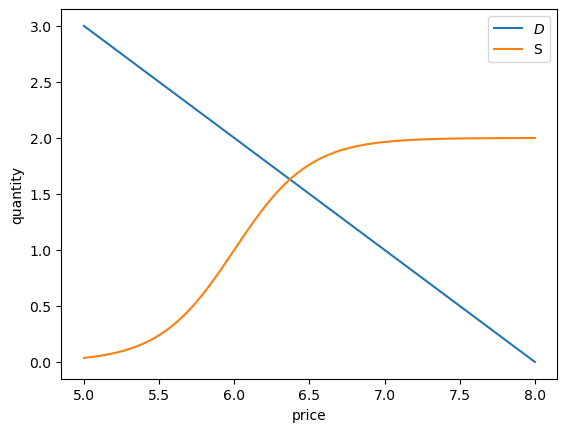

In [6]:
p_grid = np.linspace(5, 8, 200)
m = Market()
fig, ax = plt.subplots()

ax.plot(p_grid, m.demand(p_grid), label="$D$")
ax.plot(p_grid, m.supply(p_grid), label="S")
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()

plt.show()

## 市场均衡

市场均衡要求供应等于需求，即

$$
    a - b p_t = S(p^e_{t-1})
$$

以 $p_t$ 的形式重写为

$$
    p_t = - \frac{1}{b} [S(p^e_{t-1}) - a]
$$

最后，为了完成模型，我们需要描述价格预期的形成方式。

我们将假设时间 $t$ 的预期价格取决于过去的价格。

特别是，我们假设

```{math}
:label: p_et
    p^e_{t-1} = f(p_{t-1}, p_{t-2})
```

其中 $f$ 是某个函数。

因此，我们假设生产者预计时间 $t$ 的价格是某个滞后价格的函数，最多滞后 2 个周期。

（当然，我们可以增加额外的滞后期，并鼓励读者尝试这些情况。）

结合最后两个方程得出价格的动态：

```{math}
:label: price_t
    p_t = - \frac{1}{b} [ S(f(p_{t-1}, p_{t-2})) - a]
```

价格动态依赖于参数值以及决定生产者如何形成预期的函数 $f$。


## 天真的预期

为了进一步分析，我们需要指定函数 $f$，即预期的形成方式。

让我们从天真的预期开始，这指的是生产者预计下一期的现货价格等于当前时期的价格。

换句话说，

$$ p_{t-1}^e = p_{t-1} $$

使用 {eq}`price_t`，我们有

$$
    p_t = - \frac{1}{b} [ S(p_{t-1}) - a]
$$

我们可以写成

$$
    p_t = g(p_{t-1})
$$

其中 $g$ 是以下定义的函数

```{math}
:label: def_g
    g(p) = - \frac{1}{b} [ S(p) - a]
```

下面我们表示函数 $g$。

In [7]:
def g(model, current_price):
    """
    Given the current price and the Market model,
    this function finds the next price
    """
    a, b = model.a, model.b
    next_price = - (model.supply(current_price) - a) / b
    return next_price

## 价格动态的计算

通过定义函数 $g$ 使我们能够随着时间进程计算价格动态。

让我们首先定义一个辅助函数，它根据初始价格和 $g$ 生成多个价格值。

In [8]:
def generate_prices(model, p0, n):
    """
    Compute n prices in the model, starting at p0
    """
    prices = []
    p = p0
    for i in range(n):
        prices.append(p)
        p = g(model, p)
    return np.array(prices)

下面是这个函数的使用示例。

In [9]:
# 最初的价格
p0 = 3

# 定义价格模型
m = Market(a=8, b=1, c=6, d=1, λ=2.0)

# 生成价格
prices = generate_prices(m, p0, n=10)

print(prices)

[3.         7.99998771 6.00067073 6.99865853 6.03616246 6.92780092
 6.04772927 6.90483036 6.05220264 6.89597244]


## 绘制 45 度图

为了更好理解这些价格动态，我们将利用所谓的45度图（见如上）。

这个图能显示价格在函数 $g$ 下的映射关系以及价格的演变路径。

In [10]:
def plot45(model, pmin, pmax, p0, num_arrows=5):
    """
    Function to plot a 45 degree plot

    Parameters
    ==========

    model: 市场模型

    pmin: 最低价格限制

    pmax: 最高价格限制

    p0: 起始价格（用于模拟价格）

    num_arrows: 要绘制的模拟数量
    """
    pgrid = np.linspace(pmin, pmax, 200)

    fig, ax = plt.subplots()
    ax.set_xlim(pmin, pmax)
    ax.set_ylim(pmin, pmax)

    hw = (pmax - pmin) * 0.01
    hl = 2 * hw
    arrow_args = dict(fc="k", ec="k", head_width=hw,
            length_includes_head=True, lw=1,
            alpha=0.6, head_length=hl)

    ax.plot(pgrid, g(model, pgrid), 'b-',
            lw=2, alpha=0.6, label='g')
    ax.plot(pgrid, pgrid, lw=1, alpha=0.7, label='45')

    x = p0
    xticks = [pmin]
    xtick_labels = [pmin]

    for i in range(num_arrows):
        if i == 0:
            ax.arrow(x, 0.0, 0.0, g(model, x),
                     **arrow_args)
        else:
            ax.arrow(x, x, 0.0, g(model, x) - x,
                     **arrow_args)
            ax.plot((x, x), (0, x), ls='dotted')

        ax.arrow(x, g(model, x),
                 g(model, x) - x, 0, **arrow_args)
        xticks.append(x)
        xtick_labels.append(r'$p_{}$'.format(str(i)))

        x = g(model, x)
        xticks.append(x)
        xtick_labels.append(r'$p_{}$'.format(str(i+1)))
        ax.plot((x, x), (0, x), '->', alpha=0.5, color='orange')

    xticks.append(pmax)
    xtick_labels.append(pmax)
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticklabels(xtick_labels)

    bbox = (0., 1.04, 1., .104)
    legend_args = {'bbox_to_anchor': bbox, 'loc': 'upper right'}

    ax.legend(ncol=2, frameon=False, **legend_args, fontsize=14)
    plt.show()

现在我们可以设置一个市场并绘制 45 度图。

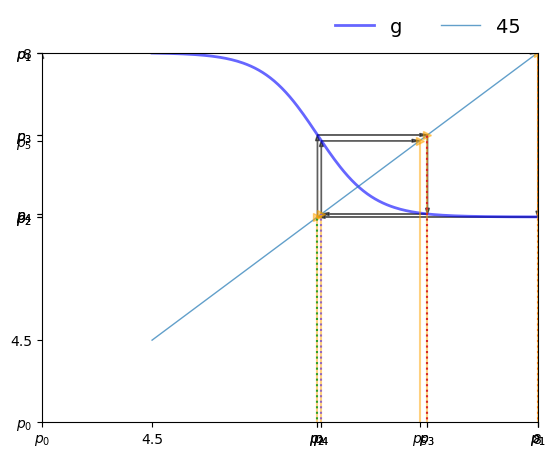

In [11]:
m = Market()
plot45(m, pmin=4.5, pmax=8, p0=3.5)

通过图中的橙色箭头，我们可以看到价格的调整路径。

例如，如果价格从区域 4 开始，那么通过 g 函数映射的价格会向均衡价格移动。

这种方法提供了均衡价格趋于稳定或发散的清晰可视化。

让我们用不同的参数集和初始值再试一次。

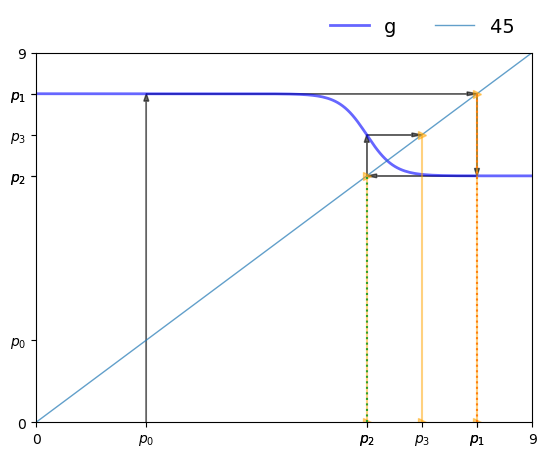

In [12]:
plot45(m, 0, 9, 2, num_arrows=3)

让我们对价格随时间的动态做一个时间序列图。

In [13]:
def ts_plot_price(model,             # 市场模型
                  p0,                # 初始价格
                  y_a=3, y_b= 12,    # 控制 y 轴
                  ts_length=10):     # 时间序列长度
    """
    模拟并绘制价格时间序列的函数。
    """
    fig, ax = plt.subplots()
    ax.set_xlabel(r'$t$', fontsize=12)
    ax.set_ylabel(r'$p_t$', fontsize=12)
    p = np.empty(ts_length)
    p[0] = p0
    for t in range(1, ts_length):
        p[t] = g(model, p[t-1])
    ax.plot(np.arange(ts_length),
            p,
            'bo-',
            alpha=0.6,
            lw=2,
            label=r'$p_t$')
    ax.legend(loc='best', fontsize=10)
    ax.set_ylim(y_a, y_b)
    ax.set_xticks(np.arange(ts_length))
    plt.show()

我们用上面的价格路径来生成并展示时间序列。

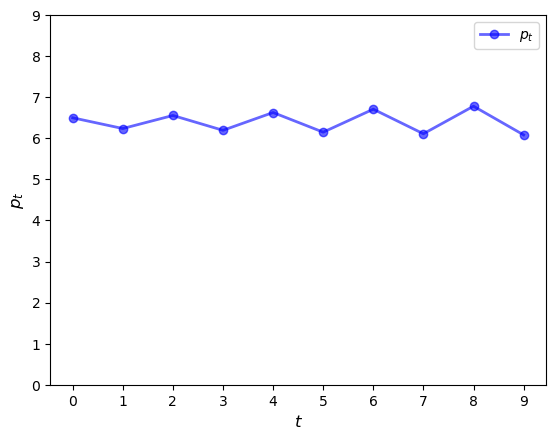

In [14]:
ts_plot_price(m, p0=6.5, y_a=0, y_b=9)

让我们再绘制多一些不同初始点的价格轨迹。

NameError: name 'simulate' is not defined

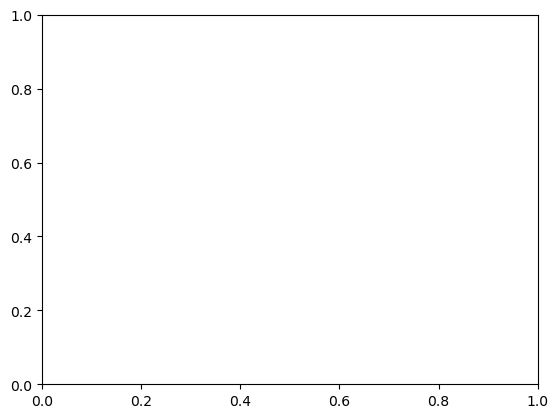

In [15]:
_, ax = plt.subplots()
init_prices = [4, 6.6, 8]
init_pe = 6
T = 10

for p0 in init_prices:
    prices = simulate(m, p0, init_pe, T)
    ax.plot(prices, label=rf'$p_0 = {p0}$')

ax.set_xlabel(r'时间$t$', fontsize=12)
ax.set_ylabel(r'价格$p_t$', fontsize=12)
ax.legend()
plt.show()

通过比较，我让我们考虑不同的权重参数$\theta$。

In [ ]:
_, ax = plt.subplots()
init_price = 6.5
init_pe = 6
T = 20

thetas = [0.3, 0.5, 0.7]

for θ in thetas:
    m = AdaptiveMarket(θ=θ, a=8, b=1, c=6, d=1, λ=2.0)
    prices = simulate(m, init_price, init_pe, T)
    ax.plot(prices, label=rf'$\theta = {θ}$')

ax.set_xlabel(r'时间 $t$', fontsize=12)
ax.set_ylabel(r'价格 $p_t$', fontsize=12)
ax.legend()
plt.show()

我们看到，权重参数$\theta$越大，价格轨迹越快收敛到均衡价。

그리하여 우리는适应性预期如何影响市场价格走势的更好理解。

## 稳定与周期

在某些情况下，价格可以形成一个稳定的周期。

如下代码展示了这种可能性。

In [ ]:
# 定义市场模型，使用 theta 值使价格轨迹形成周期
m = AdaptiveMarket(θ=0.85, a=11, b=1.1, c=6, d=1, λ=2.0)

# 运行模拟并绘制
T = 30
p0, pe0 = 6.5, 6.5
prices = simulate(m, p0, pe0, T)

fig, ax = plt.subplots()
ax.plot(np.arange(T), prices, 'bo-', alpha=0.6, lw=2)
ax.set_xlabel('时间$t$', fontsize=12)
ax.set_ylabel('价格$p_t$', fontsize=12)
plt.show()

我们看到形成了一个周期，并且这种周期是持久的。

（你可以通过绘制更长时间跨度来确认这一点。）

这个周期是“稳定的”，因为价格从大多数起点条件下都会收敛到周期上。

例如，

In [ ]:
ts_plot_price(m, 10, ts_length=15)

## 叠加模型

合成以上不同的价格预期模型，我们可以得到一个更综合的市场模型，例如，将天真的预期和适应性的预期结合。

我们假设生产者随机地使用这两种预期模型中的某一个：

```{math}
    p^e_t = \theta p_{t-1} + (1 - \theta) p^e_{t-1}
```

在这种情况下，价格动态的方程变得更为复杂。

但是我们可以使用先前定义的`Market`类和`update_price`方法来实现它。

让我们首先定义一个市场类具有组合预期的模型：

In [ ]:
class CombinedMarket(AdaptiveMarket):

    def __init__(self, naive_prob, *args, **kwargs):
        # 初始化父类
        super().__init__(*args, **kwargs)
        self.naive_prob = naive_prob

    def update_price(self, p_tm1, pe_tm1):
        """
        随机选择天真的预期或适应性的预期更新价格
        """
        use_naive = np.random.rand() < self.naive_prob
        if use_naive:
            p_t = - (self.supply(p_tm1) - self.a) / self.b
            pe_t = p_tm1
        else:
            p_t = - (self.supply(pe_tm1) - self.a) / self.b
            pe_t = self.θ * p_tm1 + (1 - self.θ) * pe_tm1

        return p_t, pe_t

接下来，我们模拟几年价格动态并绘制结果。

In [ ]:
# 新模型结合天真的预期和适应性的预期
m = CombinedMarket(naive_prob=0.3, θ=0.5, a=8, b=1, c=6, d=1, λ=2.0)
T = 30
p0, pe0 = 6.5, 6.5
prices = simulate(m, p0, pe0, T)

# 绘制价格时间序列
fig, ax = plt.subplots()
ax.plot(np.arange(T), prices, 'bo-', alpha=0.6, lw=2)
ax.set_xlabel('时间$t$', fontsize=12)
ax.set_ylabel('价格$p_t$', fontsize=12)
plt.show()

在这个模型中，由于市场参与者预测价格的方式并不总是相同，价格动态表现会更加复杂和变化。

## 不同设定下的价格动态

最后，我们用不同的参数值来探索更为详尽的市场行为。

### 初始价格与不同的权重参数 $\theta$ 下的价格动态

In [ ]:
_, ax = plt.subplots()
init_prices = [4, 6.6, 8]
thetas = [0.3, 0.5, 0.7]
T = 20

for p0 in init_prices:
    for θ in thetas:
        m = AdaptiveMarket(θ=θ, a=8, b=1, c=6, d=1, λ=2.0)
        prices = simulate(m, p0, p0, T)
        ax.plot(prices, label=rf'$p_0 = {p0}, \theta = {θ}$')

ax.set_xlabel(r'时间 $t$', fontsize=12)
ax.set_ylabel(r'价格 $p_t$', fontsize=12)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

### 不同的供应参数下价格动态

In [ ]:
_, ax = plt.subplots()
c_values = [5, 6, 7]
d_values = [1, 2]
T = 20

for c in c_values:
    for d in d_values:
        m = AdaptiveMarket(θ=0.5, a=8, b=1, c=c, d=d, λ=2.0)
        prices = simulate(m, 6.5, 6.5, T)
        ax.plot(prices, label=rf'$c = {c}, d = {d}$')

ax.set_xlabel(r'时间 $t$', fontsize=12)
ax.set_ylabel(r'价格 $p_t$', fontsize=12)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

这些图表有助于我们理解模型对参数的敏感性以及不同参数设置下的市场价格动态。

通过这些模拟，我们可以进一步探索和理解价格动态的复杂性。

我们可以通过设定不同的起始价格来观察供需模型的自适应调整

让我们用价格 $p_0 = 5$ 来调用函数。

In [ ]:
ts_price_plot_adaptive(m, 5, ts_length=30)

最后，我们可以注意到如果 $\alpha=1$，那么自适应预期就只是天真预期。

减小 $\alpha$ 值会将更多权重转移到先前的预期上，从而稳定预期价格。

这一稳定性增加在图中可以看到。

TODO 检查 / 修正练习

## 练习

```{exercise-start}
:label: cobweb_ex1
```
使用默认 `Market` 类和天真预期，绘制供给的时间序列模拟（而不是价格）。

特别地，显示供给也有循环。

```{exercise-end}
```

```{solution-start} cobweb_ex1
:class: dropdown
```

In [ ]:
def ts_plot_supply(model, p0, ts_length=10):
    """
    模拟并绘制给定初始价格的供给函数
    """
    pe_last = p0
    s_values = np.empty(ts_length)
    for i in range(ts_length):
        # 存储数量
        s_values[i] = model.supply(pe_last)
        # 更新价格
        pe_last = - (s_values[i] - model.a) / model.b


    fig, ax = plt.subplots()
    ax.plot(np.arange(ts_length),
            s_values,
            'bo-',
            alpha=0.6,
            lw=2,
            label=r'供给')

    ax.legend(loc='best', fontsize=10)
    ax.set_xticks(np.arange(ts_length))
    ax.set_xlabel("时间")
    ax.set_ylabel("数量")
    plt.show()

```{solution-end}
```

```{exercise-start}
:label: cobweb_ex2
```
**向后看的平均预期**

向后看的平均预期指的是生产者为下一期的价格预期形成一个他们最后一个猜测和倒数第二个猜测的线性组合。

即，

```{math}
:label: pe_blae
p_{t-1}^e = \alpha p_{t-1} + (1-\alpha) p_{t-2}
```

模拟并绘制价格动态，$ \alpha \in \{0.1, 0.3, 0.5, 0.8\} $，$p_0=1$ 和 $p_1=2.5$。

```{exercise-end}
```

```{solution-start} cobweb_ex2
:class: dropdown
```

In [ ]:
def find_next_price_blae(model, curr_price_exp):
    """
    Function to find the next price given the current price expectation
    and Market model
    """
    return - (model.supply(curr_price_exp) - model.a) / model.b

In [ ]:
def ts_plot_price_blae(model, p0, p1, alphas, ts_length=15):
    """
    Function to simulate and plot the time series of price
    using backward looking average expectations.
    """
    fig, axes = plt.subplots(len(alphas), 1, figsize=(8, 16))

    for ax, a in zip(axes.flatten(), alphas):
        p = np.empty(ts_length)
        p[0] = p0
        p[1] = p1
        for t in range(2, ts_length):
            pe = a*p[t-1] + (1 - a)*p[t-2]
            p[t] = -(model.supply(pe) - model.a) / model.b
        ax.plot(np.arange(ts_length),
                p,
                'o-',
                alpha=0.6,
                label=r'$\alpha={}$'.format(a))
        ax.legend(loc='best', fontsize=10)
        ax.set_xlabel(r'$t$', fontsize=12)
        ax.set_ylabel(r'$p_t$', fontsize=12)
    plt.show()

In [ ]:
m = Market()
ts_plot_price_blae(m, 
                   p0=5, 
                   p1=6, 
                   alphas=[0.1, 0.3, 0.5, 0.8], 
                   ts_length=20)

```{solution-end}
```